### Note book to use Multiple Linear Regression and Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from pprint import pprint

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(5)

In [2]:
trainset = pd.read_csv('pearsonselect.csv')

In [3]:
trainset.shape

(1562, 9)

In [4]:
trainset.head()

,population,pct_renter_occupied,rent_burden,pct_asian,pct_multiple,pct_other,pct_civilian_labor,pct_adults_bachelors_or_higher,gross_rent
0,3876,24.583,18.380,0.005635,0.005935,0.000000,0.550,0.199599,577
1,10224,28.346,26.694,0.001493,0.012033,0.000000,0.545,0.396396,844
2,27023,21.641,31.028,0.004708,0.014809,0.000905,0.508,0.219561,700
3,8735,23.110,27.734,0.004297,0.022999,0.000000,0.545,0.215431,592
4,3681,21.985,19.673,0.013622,0.016905,0.002202,0.474,0.199005,444


In [5]:
trainset.describe()

,population,pct_renter_occupied,rent_burden,pct_asian,pct_multiple,pct_other,pct_civilian_labor,pct_adults_bachelors_or_higher,gross_rent
count,1.562000e+03,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,1.083407e+05,28.525570,28.537526,0.012709,0.017583,0.000916,0.470535,0.205033,701.142125
std,3.745229e+05,8.121601,4.670467,0.026693,0.015836,0.001657,0.070936,0.092001,192.883110
min,2.690000e+02,7.279000,9.909000,0.000000,0.000000,0.000000,0.186000,0.064128,351.000000
25%,1.045275e+04,22.874000,25.869000,0.002391,0.009465,0.000000,0.425000,0.142142,578.000000
50%,2.528200e+04,27.199500,28.768000,0.005279,0.014438,0.000302,0.470500,0.182365,650.000000
75%,6.836150e+04,32.341500,31.307250,0.011886,0.020999,0.001197,0.515000,0.241234,773.750000
max,1.002029e+07,73.008000,49.665000,0.418088,0.184332,0.019582,0.996000,0.788153,1827.000000


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 9 columns):
population                        1562 non-null int64
pct_renter_occupied               1562 non-null float64
rent_burden                       1562 non-null float64
pct_asian                         1562 non-null float64
pct_multiple                      1562 non-null float64
pct_other                         1562 non-null float64
pct_civilian_labor                1562 non-null float64
pct_adults_bachelors_or_higher    1562 non-null float64
gross_rent                        1562 non-null int64
dtypes: float64(7), int64(2)
memory usage: 110.0 KB


In [7]:
X = trainset.iloc[:,0:8]
y = trainset.iloc[:,8]

In [8]:
X.shape, y.shape

((1562, 8), (1562,))

In [9]:
X.values

array([[3.87600000e+03, 2.45830000e+01, 1.83800000e+01, ...,
        0.00000000e+00, 5.50000000e-01, 1.99598796e-01],
       [1.02240000e+04, 2.83460000e+01, 2.66940000e+01, ...,
        0.00000000e+00, 5.45000000e-01, 3.96396396e-01],
       [2.70230000e+04, 2.16410000e+01, 3.10280000e+01, ...,
        9.05414000e-04, 5.08000000e-01, 2.19560878e-01],
       ...,
       [7.72240000e+04, 1.89280000e+01, 2.88270000e+01, ...,
        8.05088000e-04, 4.98000000e-01, 2.68195414e-01],
       [4.69800000e+03, 2.01070000e+01, 4.89800000e+01, ...,
        2.00298000e-04, 4.93000000e-01, 1.40000000e-01],
       [6.50813000e+05, 3.77890000e+01, 3.06870000e+01, ...,
        1.79886800e-03, 4.62000000e-01, 3.59281437e-01]])

In [10]:
y.values

array([577, 844, 700, ..., 754, 640, 976], dtype=int64)

### Apply MinMax Transformation

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_trainset = scaler.fit_transform(X=X,y=y)

In [13]:
scaled_trainset

array([[3.59979393e-04, 2.63262791e-01, 2.13074756e-01, ...,
        0.00000000e+00, 4.49382716e-01, 1.87107710e-01],
       [9.93511189e-04, 3.20513016e-01, 4.22200423e-01, ...,
        0.00000000e+00, 4.43209877e-01, 4.58918457e-01],
       [2.67005508e-03, 2.18503248e-01, 5.31215414e-01, ...,
        4.62364760e-02, 3.97530864e-01, 2.14678720e-01],
       ...,
       [7.68012592e-03, 1.77227708e-01, 4.75852701e-01, ...,
        4.11131614e-02, 3.85185185e-01, 2.81851234e-01],
       [4.42015174e-04, 1.95164996e-01, 9.82769896e-01, ...,
        1.02285514e-02, 3.79012346e-01, 1.04791700e-01],
       [6.49244343e-02, 4.64178673e-01, 5.22638092e-01, ...,
        9.18621946e-02, 3.40740741e-01, 4.07656426e-01]])

In [14]:
newdf = pd.DataFrame(data=scaled_trainset)

In [15]:
newdf

,0,1,2,3,4,5,6,7
0,0.000360,0.263263,0.213075,0.013479,0.032198,0.000000,0.449383,0.187108
1,0.000994,0.320513,0.422200,0.003571,0.065281,0.000000,0.443210,0.458918
2,0.002670,0.218503,0.531215,0.011261,0.080336,0.046236,0.397531,0.214679
3,0.000845,0.240853,0.448360,0.010278,0.124767,0.000000,0.443210,0.208974
4,0.000341,0.223737,0.245598,0.032581,0.091712,0.112473,0.355556,0.186288
5,0.000825,0.232226,0.629540,0.000000,0.108095,0.000000,0.216049,0.045401
6,0.002240,0.263552,0.486291,0.012213,0.088069,0.076243,0.350617,0.295622
7,0.002765,0.467571,0.504502,0.058681,0.073092,0.000000,0.340741,0.117778
8,0.000175,0.734729,0.299301,0.000000,0.199409,0.000000,0.206173,0.042247
9,0.001686,0.342163,0.471753,0.001913,0.076252,0.005107,0.276543,0.090135


### Perform TTS

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [17]:
X_train.shape, y_train.shape

((1405, 8), (1405,))

In [18]:
X_test.shape, y_test.shape

((157, 8), (157,))

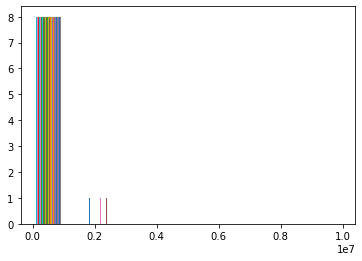

In [19]:
plt.hist(X_train)
plt.show()

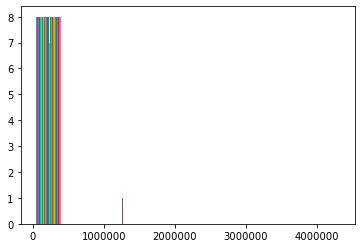

In [20]:
plt.hist(X_test)
plt.show()

In [21]:
X_train

,population,pct_renter_occupied,rent_burden,pct_asian,pct_multiple,pct_other,pct_civilian_labor,pct_adults_bachelors_or_higher
509,11041,25.813,23.725,0.011530,0.005656,0.000000,0.565,0.156843
691,6467,26.923,38.635,0.001777,0.004003,0.002017,0.381,0.271543
246,189572,28.370,30.540,0.008335,0.014569,0.000797,0.450,0.196000
399,3359,26.090,21.787,0.006783,0.007093,0.000000,0.492,0.188188
1004,9156,41.388,39.387,0.004705,0.004334,0.000000,0.397,0.113226
1291,42309,41.049,36.694,0.003388,0.013661,0.000000,0.383,0.140578
615,167777,21.809,34.479,0.021616,0.018247,0.002852,0.473,0.230151
866,16382,26.284,37.299,0.007678,0.008428,0.012172,0.401,0.259701
1022,9984,31.376,33.130,0.004409,0.005722,0.000000,0.358,0.130739
199,70385,29.398,26.372,0.006516,0.016430,0.000887,0.451,0.189432


In [22]:
y_train

509      566
691      597
246      675
399      512
1004     594
1291     564
615     1014
866      689
1022     512
199      714
1325     522
424      618
1556     799
888      542
783      666
468      791
1304     590
1127     574
533      936
928      508
217      837
1521     618
1273     840
1516     859
208      710
194     1093
1084     693
1545     716
426      632
810      736
32       497
299      661
791      756
769      768
561      581
1220     578
475      772
906      672
1257     682
133      713
982      623
732      671
1415    1063
7        725
1356     721
910      689
1057     538
552      612
742      665
386      575
501     1169
1063     796
1228     672
308      595
1532     742
916      680
708      551
924      608
1017     512
366      521
222      486
1194     535
40       558
957      562
1002    1042
1001     981
964     1104
388      486
575      569
15      1001
346      599
531      351
1501     671
189      930
1509     595
12       645
626     1320

### Linear Regression Test Model

In [23]:
linreg = LinearRegression(n_jobs=-1)

In [24]:
linregFit = linreg.fit(X_train,y_train)

In [25]:
y_predict = linregFit.predict(X_test)

In [26]:
y_predict[0:5]

array([552.51876736, 832.81793878, 654.96682389, 666.5613717 ,
       623.84856873])

Text(0, 0.5, 'Predictions')

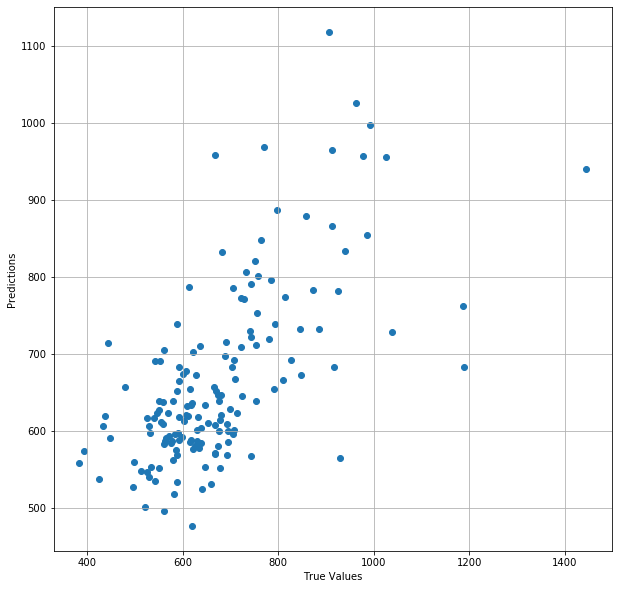

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)
plt.grid()
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Model Evaluation

In [28]:
linregFit.score(X_test,y_test)  #Returns R2 score

0.4155996016167558

### Perform Cross-Validation

Cross-validation is another method to estimate the skill of a method on unseen data. Like using a train-test split.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

This, in turn, provides a population of performance measures.

- We can calculate the mean of these measures to get an idea of how well the procedure performs on average.
- We can calculate the standard deviation of these measures to get an idea of how much the skill of the procedure is expected to vary in practice.

The train-test split and k-fold cross validation are called resampling methods. Resampling methods are statistical procedures for sampling a dataset and estimating an unknown quantity.

In the case of applied machine learning, we are interested in estimating the skill of a machine learning procedure on unseen data. More specifically, the skill of the predictions made by a machine learning procedure.

Once we have the estimated skill, we are finished with the resampling method.

- If you are using a train-test split, that means you can discard the split datasets and the trained model.
- If you are using k-fold cross-validation, that means you can throw away all of the trained models.

They have served their purpose and are no longer needed.

You are now ready to finalize your model.

When choosing a value for k each fold(group) should be large enough to be **representative** of the model (commonly k=10 or k=5) and small enough to be computed in a reasonable amount of time. Depending on the dataset size, different k values can sometimes be experimented with. As a general rule, as k increases, bias decreases and variance increases.

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

In [29]:
r2score = cross_val_score(linregFit,X,y,cv=5,n_jobs=-1,scoring='r2')

In [30]:
r2score

array([0.59943752, 0.64740411, 0.54777215, 0.54914086, 0.58479092])

In [31]:
r2score.mean()

0.585709112139385

In [32]:
r2score.std()

0.03680226674826336

In [33]:
result2 = cross_validate(linregFit,X,y,cv=5,return_train_score=True)

In [34]:
result2

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0.        , 0.        , 0.01562452, 0.        , 0.01562238]),
 'test_score': array([0.59943752, 0.64740411, 0.54777215, 0.54914086, 0.58479092]),
 'train_score': array([0.6010036 , 0.59309112, 0.61800688, 0.60895038, 0.60747307])}

### Using RandomGridSearch to tune hyperparameters

In [ ]:
base = LinearRegression()

In [ ]:
params = {'n_estimators' : [50,100,150],
          'loss':['linear','square', 'exponential'],
          'learning_rate':[0.5,0.75,1.0]          
         }

pprint(params)

In [ ]:
random = RandomizedSearchCV(base,params,n_iter=100,scoring='r2',n_jobs=-1,cv=5,verbose=1,random_state=5,return_train_score=True)

In [ ]:
random.fit(X_train,y_train)

In [ ]:
random.best_params_

### Using GridSearchCV to tune hyperparameters

In [ ]:
base = AdaBoostRegressor(loss='exponential',random_state=5)

In [ ]:
params = {'n_estimators' : [150,200,250],
          'learning_rate':[0.01,0.05,0.1]
         }

pprint(params)

In [ ]:
grid = GridSearchCV(base,params,scoring='r2',n_jobs=-1,cv=5,verbose=1,return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
#Best hyperparams for Adaboost: 
#n_estimators = 200
#loss'='exponential
#learning_rate = 0.05

### Select best model and train with all trainset data

In [35]:
linreg = LinearRegression(n_jobs=-1)

In [36]:
linregFit = linreg.fit(scaled_trainset,y)

In [37]:
y_predict = linregFit.predict(testset)

NameError: name 'testset' is not defined

In [ ]:
y_predict

In [ ]:
testresult = pd.DataFrame(y_predict.astype(int), columns=['gross_rent'])

In [ ]:
testresult

In [ ]:
#testresult.to_csv("MLR.csv",index_label=['row_id'])